In [1]:
import pandas as pd
import json

# Load the JSON
with open('TextOCR_0.1_train.json', 'r') as f:
    data = json.load(f)

# Initialize a list to store rows for the DataFrame
rows = []

# Iterate over images
for image_id, image_data in data['imgs'].items():
    for ann_id in data['imgToAnns'][image_id]:
        ann_data = data['anns'][ann_id]
        
        row = {
            'image_id': image_id,
            'width': image_data['width'],
            'height': image_data['height'],
            'filename': image_data['file_name'],
            'bbox_x1': ann_data['bbox'][0],
            'bbox_y1': ann_data['bbox'][1],
            'bbox_x2': ann_data['bbox'][2],
            'bbox_y2': ann_data['bbox'][3],
            'text': ann_data['utf8_string'],
            'area': ann_data['area'],
            'points': ann_data['points']
        }
        
        rows.append(row)

# Convert the list of rows to a DataFrame
df = pd.DataFrame(rows)

# Check the top rows of the DataFrame
print(df.head())


           image_id  width  height                    filename  bbox_x1  \
0  a4ea732cd3d5948a    840    1024  train/a4ea732cd3d5948a.jpg   525.83   
1  a4ea732cd3d5948a    840    1024  train/a4ea732cd3d5948a.jpg   534.67   
2  a4ea732cd3d5948a    840    1024  train/a4ea732cd3d5948a.jpg   626.95   
3  a4ea732cd3d5948a    840    1024  train/a4ea732cd3d5948a.jpg   577.40   
4  a4ea732cd3d5948a    840    1024  train/a4ea732cd3d5948a.jpg   391.03   

   bbox_y1  bbox_x2  bbox_y2         text     area  \
0     3.40   197.64    33.94  Performance  6707.90   
1    64.68    91.22    38.19        Sport  3483.69   
2    63.62    96.52    31.82        Watch  3071.27   
3   141.87   147.13    43.10   ...period.  6341.30   
4   163.90    60.82    38.65            .  2350.69   

                                              points  
0  [525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...  
1  [535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...  
2  [626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...  
3  [

In [2]:
#load the json
with open('TextOCR_0.1_train.json','r') as f:
    data = json.load(f)
    
print(data.keys())

dict_keys(['info', 'imgs', 'anns', 'imgToAnns'])


In [3]:
# 1. Data Cleaning: Check for missing values
print(df.isnull().sum())

image_id    0
width       0
height      0
filename    0
bbox_x1     0
bbox_y1     0
bbox_x2     0
bbox_y2     0
text        0
area        0
points      0
dtype: int64


In [4]:
import json
import cv2 
import matplotlib.pyplot as plt
import numpy as np


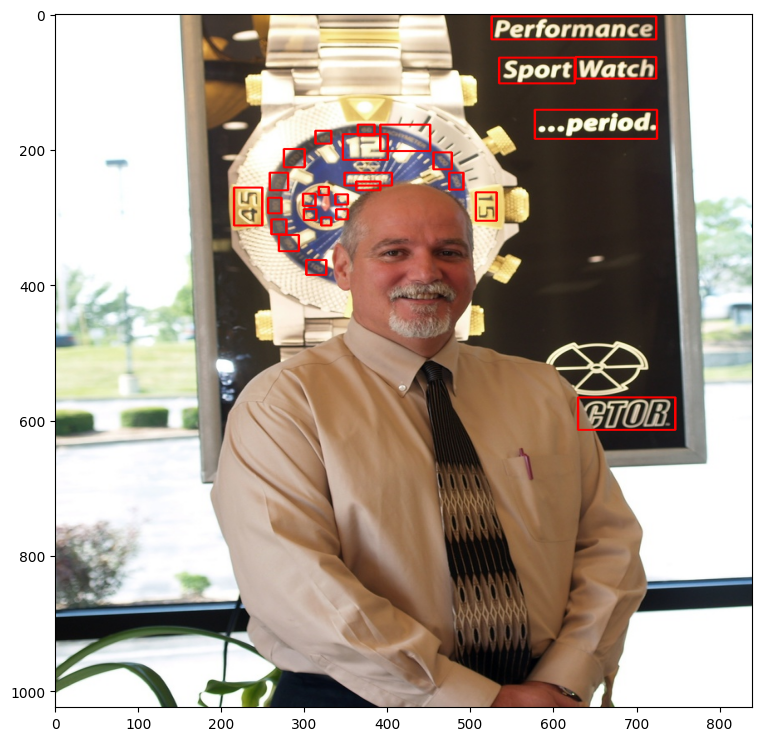

In [5]:
def plot_corrected_sample(image_id):
    img_path = df[df['image_id'] == image_id].iloc[0]['filename']
    img = cv2.imread(img_path)
    
    # Check if the image was successfully loaded
    if img is None:
        print(f"Failed to load image from path: {img_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    annotations = df[df['image_id'] == image_id]
    for _, ann in annotations.iterrows():
        # Using bbox_x1, bbox_y1 as starting coordinates
        # and bbox_x1+bbox_x2, bbox_y1+bbox_y2 as ending coordinates
        start_point = (int(ann['bbox_x1']), int(ann['bbox_y1']))
        end_point = (int(ann['bbox_x1'] + ann['bbox_x2']), int(ann['bbox_y1'] + ann['bbox_y2']))
        
        cv2.rectangle(img, start_point, end_point, color=(255, 0, 0), thickness=2)
    
    plt.figure(figsize=(9,9))
    plt.imshow(img, aspect='auto')
    plt.show()

# Call the corrected function
plot_corrected_sample('a4ea732cd3d5948a')


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [7]:
img_path = df[df['image_id'] == image_id].iloc[0]['filename']
df

image_id  width  height                    filename  bbox_x1  \
0        a4ea732cd3d5948a    840    1024  train/a4ea732cd3d5948a.jpg   525.83   
1        a4ea732cd3d5948a    840    1024  train/a4ea732cd3d5948a.jpg   534.67   
2        a4ea732cd3d5948a    840    1024  train/a4ea732cd3d5948a.jpg   626.95   
3        a4ea732cd3d5948a    840    1024  train/a4ea732cd3d5948a.jpg   577.40   
4        a4ea732cd3d5948a    840    1024  train/a4ea732cd3d5948a.jpg   391.03   
...                   ...    ...     ...                         ...      ...   
1052349  0ebbecdc46b78d42   1024     681  train/0ebbecdc46b78d42.jpg   267.47   
1052350  a37e1fb026b80a6d   1024     683  train/a37e1fb026b80a6d.jpg   331.69   
1052351  a37e1fb026b80a6d   1024     683  train/a37e1fb026b80a6d.jpg   876.75   
1052352  a37e1fb026b80a6d   1024     683  train/a37e1fb026b80a6d.jpg   913.53   
1052353  a37e1fb026b80a6d   1024     683  train/a37e1fb026b80a6d.jpg   883.47   

         bbox_y1  bbox_x2  bbox_y2         text      area  \
0           3.40   197.64    33.94  Performance   6707.90   
1          64.68    91.22    38.19        Sport   3483.69   
2          63.62    96.52    31.82        Watch   3071.27   
3         141.87   147.13    43.10   ...period.   6341.30   
4         163.90    60.82    38.65            .   2350.69   
...          ...      ...      ...          ...       ...   
1052349    -0.14    28.18    27.47            .    774.10   
1052350   462.84   417.31   201.08          RÖR  83912.69   
1052351   285.63    36.98    10.28      Moderna    380.15   
1052352   282.86    32.23    11.27       Museet    363.23   
1052353   302.44    68.42    10.88            .    744.41   

                                                                   points  
0               [525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525.83, 37.34]  
1          [535.73, 64.68, 623.41, 67.51, 625.89, 102.87, 534.67, 102.51]  
2             [626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 628.36, 95.44]  
3         [580.02, 143.61, 724.53, 141.87, 723.66, 184.97, 577.4, 184.97]  
4          [395.2, 163.9, 451.85, 191.94, 445.59, 202.55, 391.03, 178.87]  
...                                                                   ...  
1052349       [295.65, -0.14, 295.65, 27.33, 267.47, 27.03, 267.47, 0.16]  
1052350    [331.69, 466.97, 749.0, 462.84, 749.0, 659.79, 333.07, 663.92]  
1052351  [876.75, 287.61, 912.34, 285.63, 913.73, 293.94, 877.14, 295.91]  
1052352  [913.53, 284.84, 944.77, 282.86, 945.76, 292.35, 914.12, 294.13]  
1052353  [883.47, 304.02, 950.71, 302.44, 951.89, 311.54, 883.47, 313.32]  

[1052354 rows x 11 columns]

In [8]:
'''img_path = df[df['image_id'] == image_id].iloc[0]['filename']
img = cv2.imread(img_path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)'''

"img_path = df[df['image_id'] == image_id].iloc[0]['filename']\nimg = cv2.imread(img_path)\nimage_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)"

In [9]:
# Redefining the preprocessing pipeline and the required functions

def augment_image_corrected(image, annotations):
    """Randomly flip the image for augmentation and update bounding boxes accordingly, without changing its color."""
    flipped = False
    if np.random.rand() < 0.5:
        image = np.fliplr(image)
        flipped = True
        
    # If the image was flipped, update the bounding box coordinates
    if flipped:
        image_width = image.shape[1]
        for index, row in annotations.iterrows():
            old_x1 = row['bbox_x1']
            old_x2 = old_x1 + row['bbox_x2']
            
            new_x1 = image_width - old_x2
            new_x2 = new_x1 + (old_x2 - old_x1)
            
            annotations.at[index, 'bbox_x1'] = new_x1
            annotations.at[index, 'bbox_x2'] = new_x2 - new_x1  # Storing width instead of x-coordinate
            
    return image, annotations






def reduce_noise(image):
    """Apply Gaussian blur to the image."""
    return cv2.GaussianBlur(image, (5,5), 0)

def correct_skew(image):
    """Correct the skew of the image."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

def equalize_histogram(image):
    """Equalize the histogram of the image."""
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return img_output

def denoise_image(image):
    """Denoise the image."""
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

def preprocessing_pipeline_with_bbox_update(image, annotations):
    """Apply preprocessing steps to the image and update bounding box annotations accordingly."""
    # Augment the image
    image, annotations = augment_image(image, annotations)
    
    # Apply other preprocessing steps
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb = reduce_noise(image_rgb)
    image_rgb = correct_skew(image_rgb)
    image_rgb = equalize_histogram(image_rgb)
    image_rgb = denoise_image(image_rgb)
    
    return image_rgb, annotations




In [10]:



# Adjusting the display_random_preprocessed_image function to use the updated preprocessing pipeline
def display_random_preprocessed_image_corrected(df, num_iterations=5):
    unique_image_ids = df['image_id'].unique()
    
    for _ in range(num_iterations):
        random_image_id = random.choice(unique_image_ids)
        annotations = df[df['image_id'] == random_image_id].copy()
        
        # Load the image using OpenCV
        img_path = annotations.iloc[0]['filename']
        image = cv2.imread(img_path)
        
        # Preprocess the image and update annotations
        preprocessed_image, updated_annotations = preprocessing_pipeline_with_bbox_update(image, annotations)
        
        # Draw bounding boxes on the preprocessed image
        for _, ann in updated_annotations.iterrows():
            x1, y1 = int(ann['bbox_x1']), int(ann['bbox_y1'])
            x2, y2 = int(ann['bbox_x2']), int(ann['bbox_y2'])
            cv2.rectangle(preprocessed_image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
        
        # Display the preprocessed image with bounding boxes
        plt.figure(figsize=(9,9))
        plt.imshow(preprocessed_image)
        plt.title(f'Preprocessed Image with Bounding Boxes (ID: {random_image_id})')
        plt.show()

# Displaying the preprocessed image with correctly aligned bounding boxes
display_random_preprocessed_image_corrected(df, num_iterations=5)

NameError: name 'random' is not defined

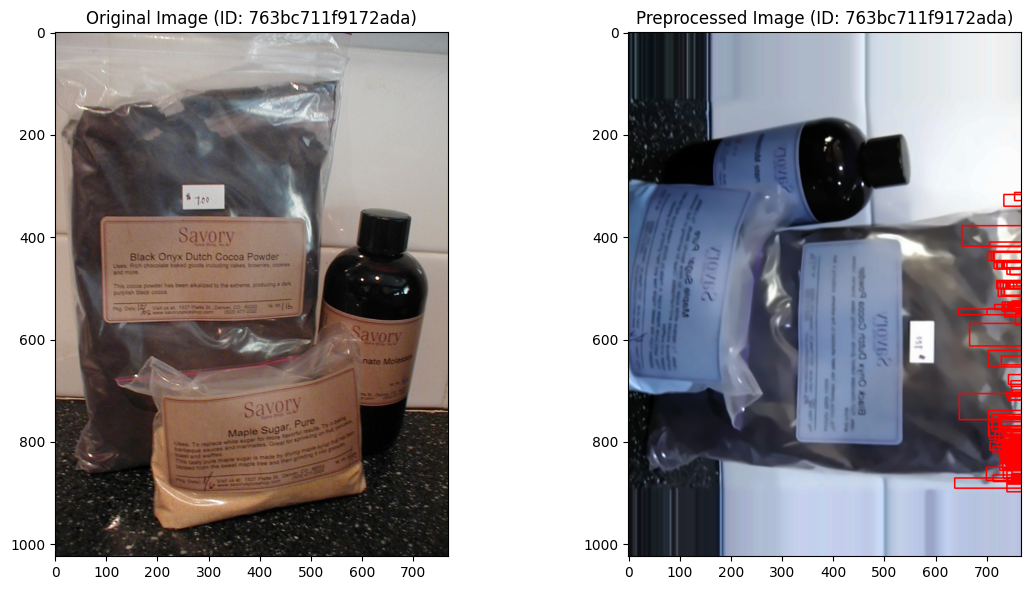

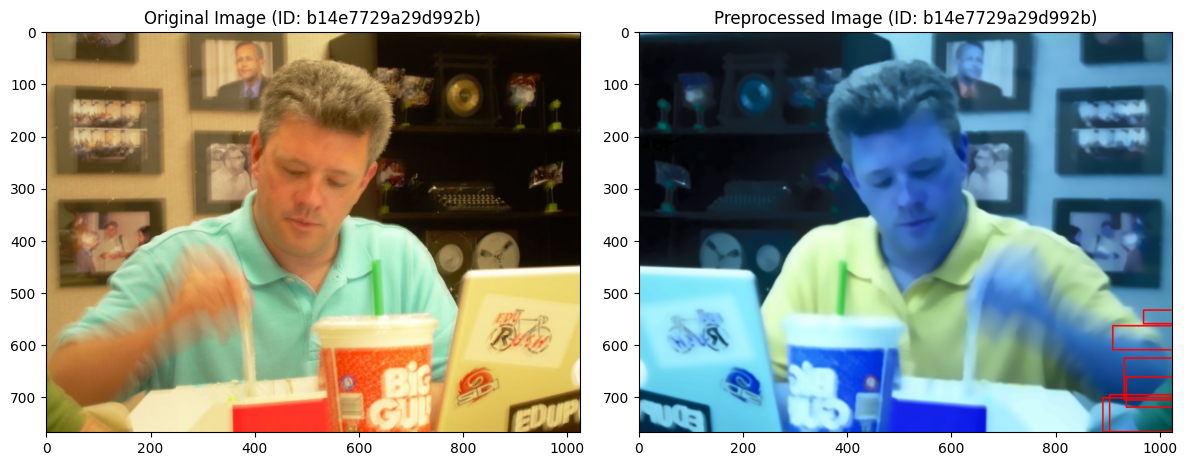

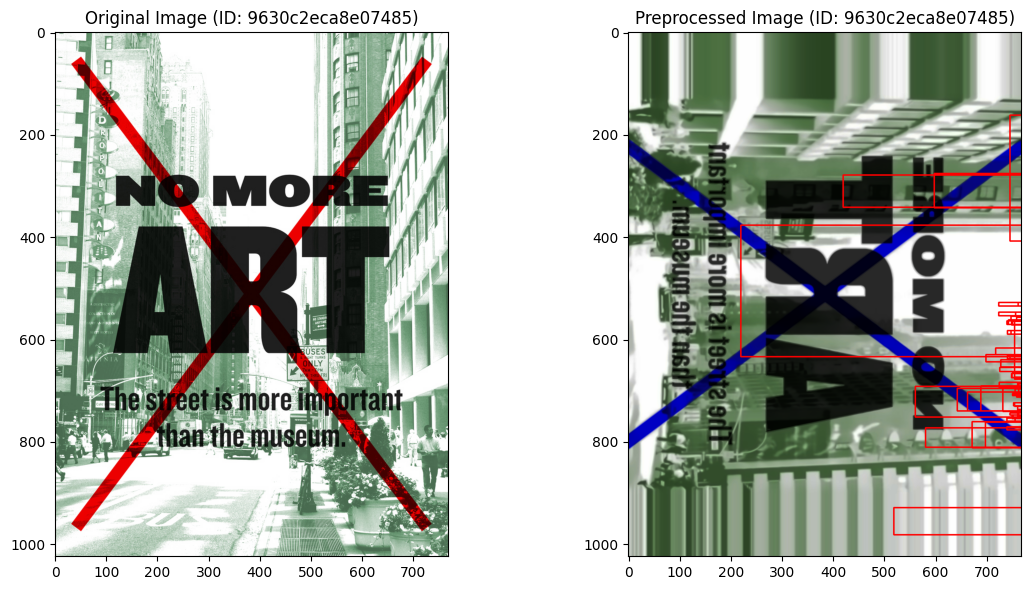

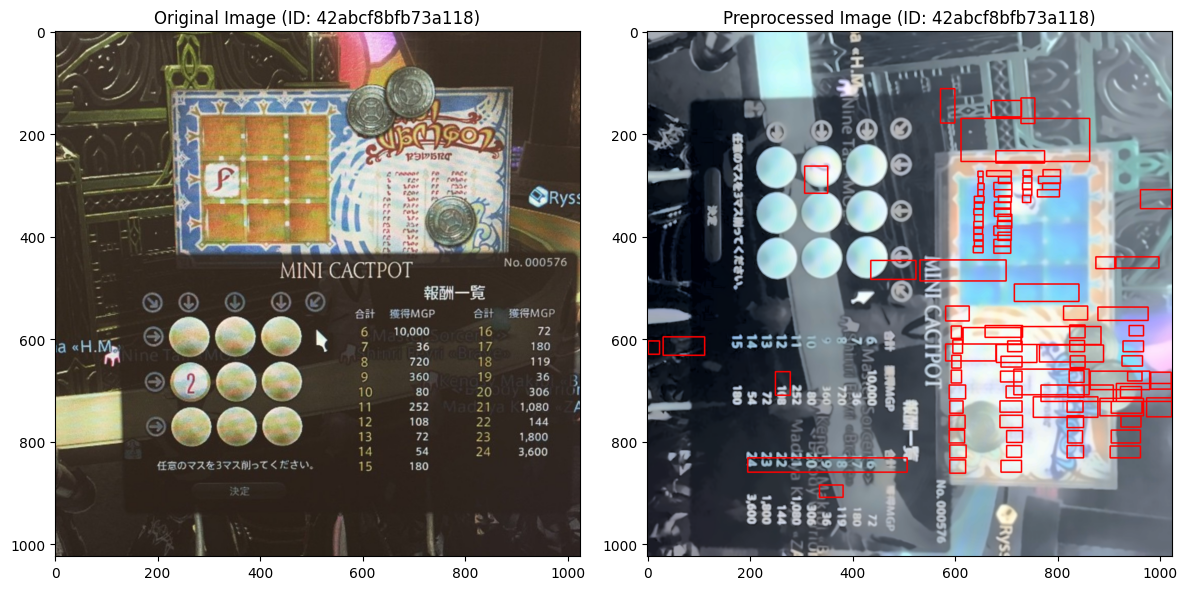

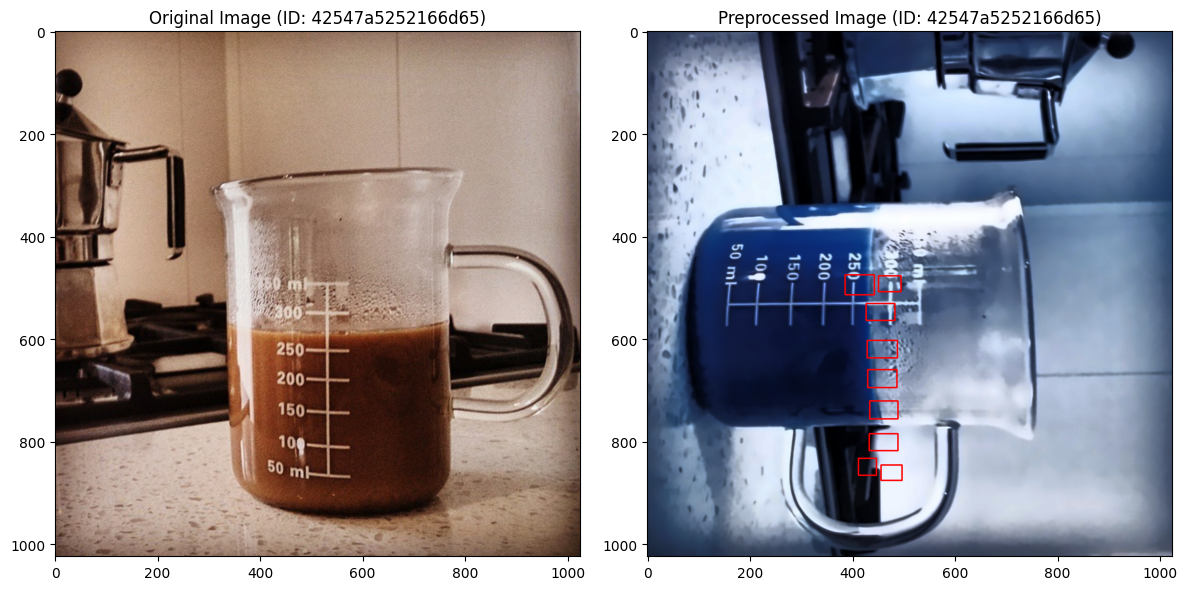

In [ ]:
def display_original_and_preprocessed_images(df, num_iterations=5):
    unique_image_ids = df['image_id'].unique()
    
    for _ in range(num_iterations):
        random_image_id = random.choice(unique_image_ids)
        annotations = df[df['image_id'] == random_image_id]
        
        # Load the original image using OpenCV
        img_path = annotations.iloc[0]['filename']
        original_image = cv2.imread(img_path)
        original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        
        # Preprocess the image and update annotations
        preprocessed_image, updated_annotations = preprocessing_pipeline(original_image_rgb, annotations.copy())
        
        # Draw bounding boxes on the preprocessed image
        for _, ann in updated_annotations.iterrows():
            x1, y1 = int(ann['bbox_x1']), int(ann['bbox_y1'])
            x2, y2 = x1 + int(ann['bbox_x2']), y1 + int(ann['bbox_y2'])
            cv2.rectangle(preprocessed_image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
        
        # Display the original and preprocessed images side by side
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.imshow(original_image_rgb)
        plt.title(f'Original Image (ID: {random_image_id})')
        
        plt.subplot(1, 2, 2)
        plt.imshow(preprocessed_image)
        plt.title(f'Preprocessed Image (ID: {random_image_id})')
        
        plt.tight_layout()
        plt.show()

# Display 5 random sets of original and preprocessed images
display_original_and_preprocessed_images(df, num_iterations=5)


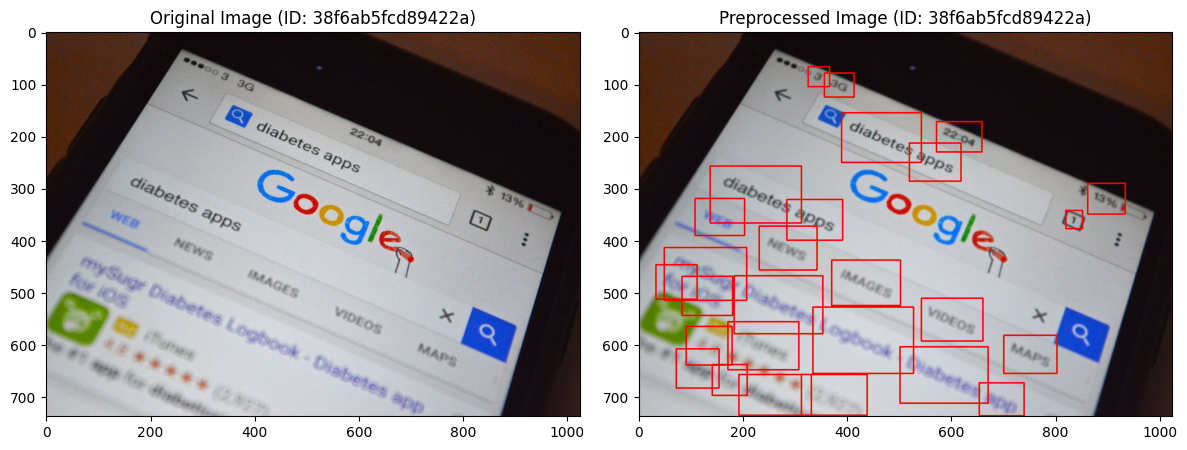

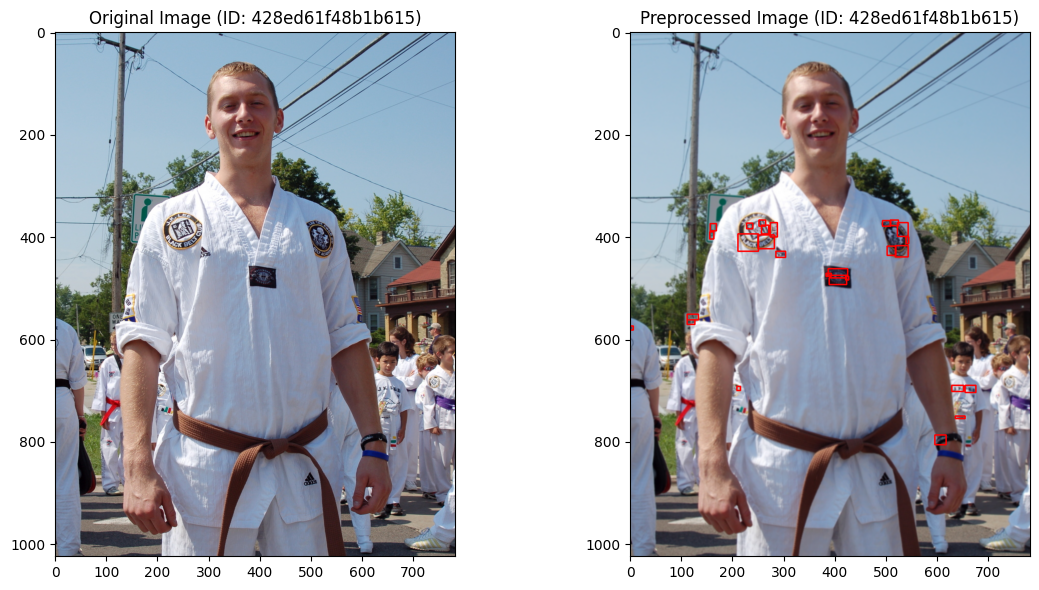

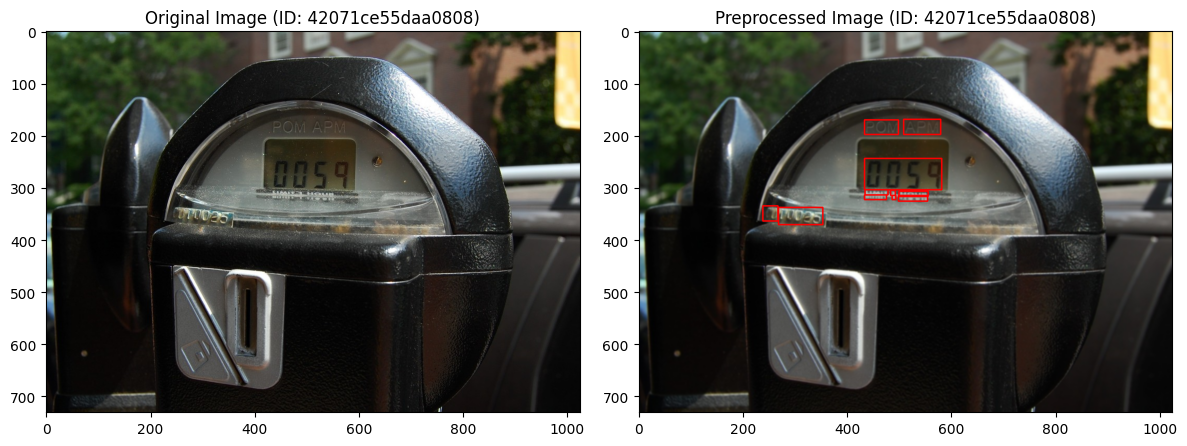

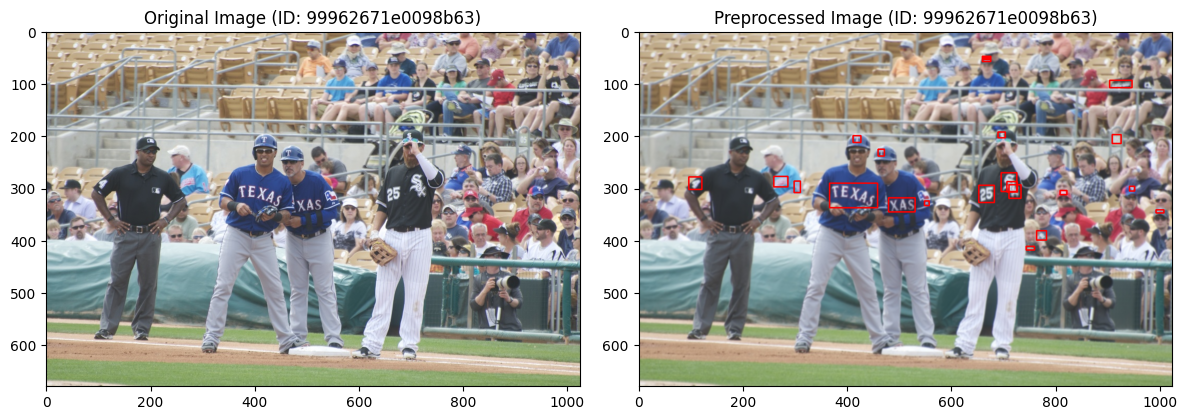

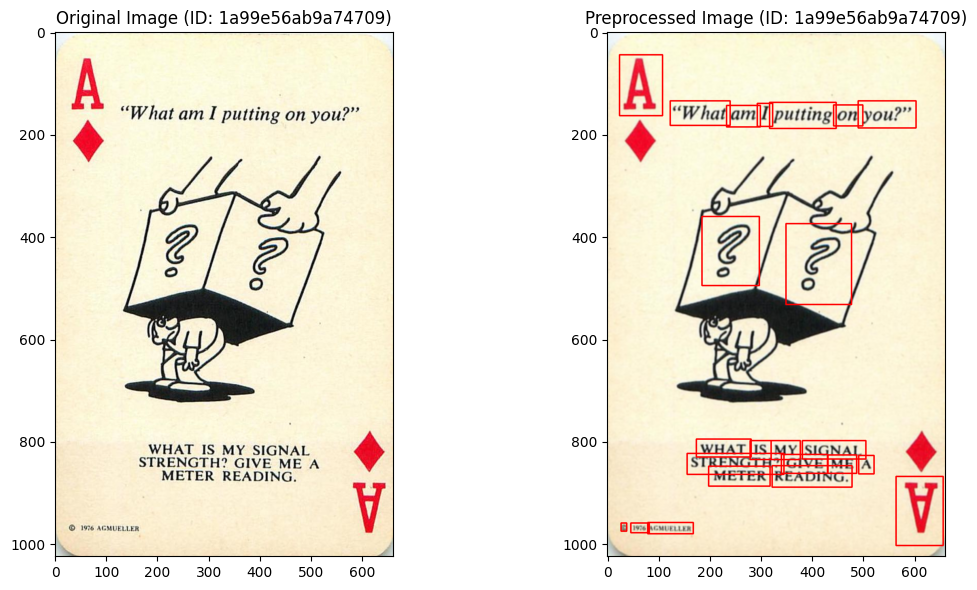

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

def reduce_noise(image):
    """Apply Gaussian blur to the image."""
    return cv2.GaussianBlur(image, (5,5), 0)

def correct_skew(image):
    """Correct the skew of the image if skew is significant."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    coords = np.column_stack(np.where(gray > 0))
    angle = cv2.minAreaRect(coords)[-1]
    
    # Check if the angle is significant enough to warrant rotation
    if -45 < angle < -5:
        angle = -(90 + angle)
    elif 5 < angle < 45:
        angle = -angle
    else:
        # If not significant, return the original image
        return image

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    corrected_skew = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return corrected_skew

def preprocess_image_color(image):
    """
    Preprocesses the image for OCR training without grayscale conversion.
    """
    # Noise reduction
    denoised = reduce_noise(image)
    
    # Skew correction
    corrected_skew = correct_skew(denoised)
    
    return corrected_skew

def display_original_and_preprocessed_images(df, num_iterations=5):
    unique_image_ids = df['image_id'].unique()
    
    for _ in range(num_iterations):
        random_image_id = random.choice(unique_image_ids)
        annotations = df[df['image_id'] == random_image_id]
        
        # Load the original image using OpenCV
        img_path = annotations.iloc[0]['filename']
        original_image = cv2.imread(img_path)
        original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        
        # Preprocess the image
        preprocessed_image = preprocess_image_color(original_image_rgb)
        
        # Draw bounding boxes on the preprocessed image
        for _, ann in annotations.iterrows():
            x1, y1 = int(ann['bbox_x1']), int(ann['bbox_y1'])
            x2, y2 = x1 + int(ann['bbox_x2']), y1 + int(ann['bbox_y2'])
            cv2.rectangle(preprocessed_image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
        
        # Display the original and preprocessed images side by side
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.imshow(original_image_rgb)
        plt.title(f'Original Image (ID: {random_image_id})')
        
        plt.subplot(1, 2, 2)
        plt.imshow(preprocessed_image)
        plt.title(f'Preprocessed Image (ID: {random_image_id})')
        
        plt.tight_layout()
        plt.show()

# Assuming your dataframe is stored in the variable df
# Display 5 random sets of original and preprocessed images
display_original_and_preprocessed_images(df, num_iterations=5)
